In [5]:
import os
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt

# Set environment variable for PySpark Python path
os.environ["PYSPARK_PYTHON"] = "python3"  # Adjust the Python path if necessary

In [6]:
# Initialize Spark session
spark = SparkSession.builder.master("local[*]").appName("TestApp").getOrCreate()

# Load the CSV file into a DataFrame
df = (
    spark.read.format("csv")
    .option("header", "true")
    .option("inferSchema", "true")
    .load("data/customer_feedback_satisfaction.csv")
)

# Register the DataFrame as a temporary SQL view
df.createOrReplaceTempView("customer_feedback")

# Use Spark SQL to query the data
result = spark.sql("SELECT * FROM customer_feedback")
result.show()

+----------+---+------+-------+------+--------------+--------------+-----------------+-------------+------------+-----------------+
|CustomerID|Age|Gender|Country|Income|ProductQuality|ServiceQuality|PurchaseFrequency|FeedbackScore|LoyaltyLevel|SatisfactionScore|
+----------+---+------+-------+------+--------------+--------------+-----------------+-------------+------------+-----------------+
|         1| 56|  Male|     UK| 83094|             5|             8|                5|          Low|      Bronze|            100.0|
|         2| 69|  Male|     UK| 86860|            10|             2|                8|       Medium|        Gold|            100.0|
|         3| 46|Female|    USA| 60173|             8|            10|               18|       Medium|      Silver|            100.0|
|         4| 32|Female|     UK| 73884|             7|            10|               16|          Low|        Gold|            100.0|
|         5| 60|  Male|     UK| 97546|             6|             4|        

In [ ]:
# Display summary statistics for numerical columns
result.describe(["Age", "Income", "PurchaseFrequency", "SatisfactionScore"]).show()

+-------+------------------+------------------+------------------+------------------+
|summary|               Age|            Income| PurchaseFrequency| SatisfactionScore|
+-------+------------------+------------------+------------------+------------------+
|  count|             38444|             38444|             38444|             38444|
|   mean| 43.49685256476953|  75076.6192383727|10.453880969722194| 85.27640906253298|
| stddev|14.972748458410438|25975.752966300628| 5.765621461501437|16.898577188472004|
|    min|                18|             30001|                 1|              4.28|
|    max|                69|            119999|                20|             100.0|
+-------+------------------+------------------+------------------+------------------+



In [ ]:
# Calculate average satisfaction score by country
avg_satisfaction_by_country = spark.sql(
    """
    SELECT Country, AVG(SatisfactionScore) AS Avg_Satisfaction
    FROM customer_feedback
    GROUP BY Country
    ORDER BY Avg_Satisfaction DESC
"""
)
avg_satisfaction_by_country.show()

+-------+-----------------+
|Country| Avg_Satisfaction|
+-------+-----------------+
| Canada|85.41306252437259|
|    USA|85.37981834578709|
| France|85.26307772155195|
|Germany|85.26168539325846|
|     UK|85.06160854745677|
+-------+-----------------+



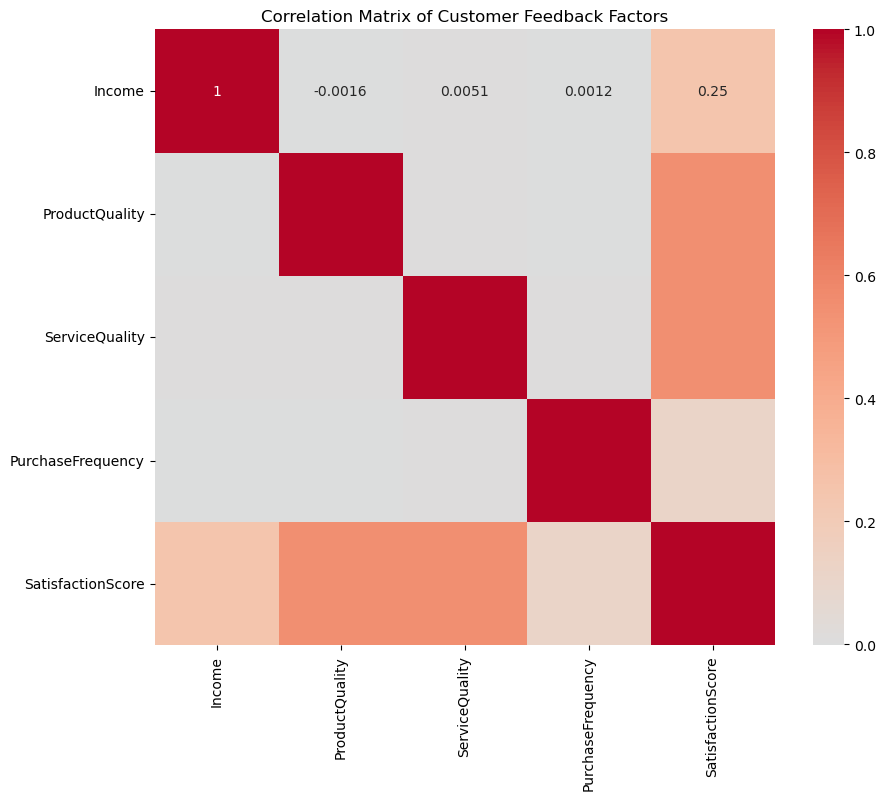

In [ ]:
# Selecting numerical columns for correlation analysis
numerical_cols = [
    "Income",
    "ProductQuality",
    "ServiceQuality",
    "PurchaseFrequency",
    "SatisfactionScore",
]

correlation_df = df.select(numerical_cols)

# Convert to Pandas for correlation matrix calculation
correlation_matrix = correlation_df.toPandas().corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Customer Feedback Factors")
plt.show()

In [ ]:
# Retrieve satisfaction scores
satisfaction_scores = df.select("SatisfactionScore")
satisfaction_scores.show(50)

+-----------------+
|SatisfactionScore|
+-----------------+
|            100.0|
|            100.0|
|            100.0|
|            100.0|
|             82.0|
|            80.71|
|            100.0|
|            100.0|
|            100.0|
|            86.48|
|             94.6|
|            81.85|
|            95.99|
|            100.0|
|            100.0|
|            52.34|
|            73.48|
|            86.31|
|            100.0|
|            85.16|
|            69.85|
|            92.23|
|            90.59|
|            99.65|
|            49.73|
|            70.82|
|            100.0|
|            100.0|
|            75.74|
|            100.0|
|            100.0|
|            100.0|
|            100.0|
|            100.0|
|            100.0|
|            100.0|
|            88.16|
|            63.97|
|            100.0|
|            91.94|
|            100.0|
|            72.89|
|            100.0|
|            96.58|
|            63.49|
|            79.86|
|            98.21|


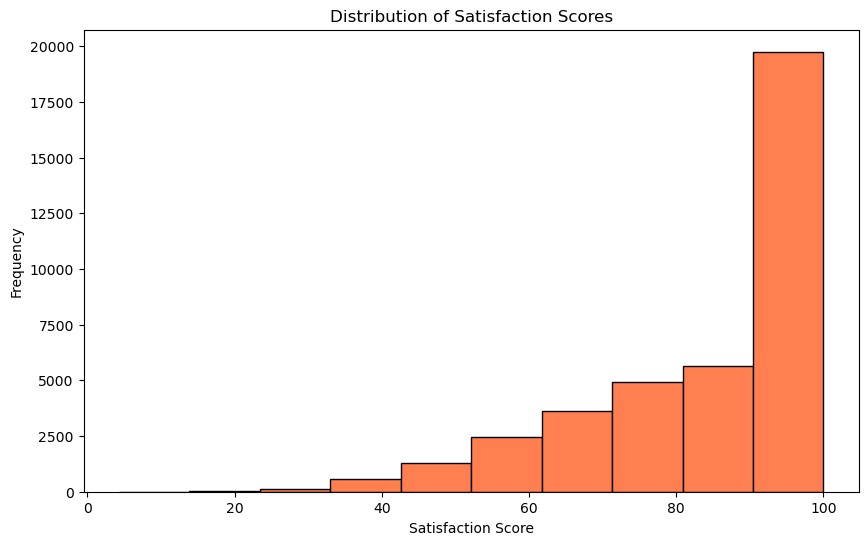

24/11/09 16:52:34 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 323520 ms exceeds timeout 120000 ms
24/11/09 16:52:34 WARN SparkContext: Killing executors is not supported by current scheduler.
24/11/09 16:52:38 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$

In [ ]:
# Convert to Pandas for plotting
satisfaction_scores_df = satisfaction_scores.toPandas()

plt.figure(figsize=(10, 6))
plt.hist(
    satisfaction_scores_df["SatisfactionScore"],
    bins=10,
    color="coral",
    edgecolor="black",
)
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.title("Distribution of Satisfaction Scores")
plt.show()